In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/6/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /gdrive
/gdrive


In [2]:
train_set = pd.read_csv(root+"states_all.csv")

Bu ödevde [ABD Eğitim Sistemi](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)'ne ait verileri inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. **Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!**

2. Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır? 

3. Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

4. Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5. Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden? 

In [4]:
train_set = train_set.fillna(train_set.mean())

In [5]:
train_set

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,917541.566176,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,7.350360e+05,429950.933824,1.740530e+05,8224.000000,55460.00000,57948.000000,58025.000000,41167.000000,577954.717647,282069.084967,7.316340e+05,208.000000,252.000000,207.000000,263.558719
1,1992_ALASKA,ALASKA,1992,917541.566176,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,3.509020e+05,429950.933824,3.745100e+04,2371.000000,10152.00000,9748.000000,8789.000000,6714.000000,577954.717647,282069.084967,1.224870e+05,236.327434,278.280731,218.806154,263.558719
2,1992_ARIZONA,ARIZONA,1992,917541.566176,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,1.007732e+06,429950.933824,6.091140e+05,2544.000000,53497.00000,55433.000000,49081.000000,37410.000000,577954.717647,282069.084967,6.734770e+05,215.000000,265.000000,209.000000,263.558719
3,1992_ARKANSAS,ARKANSAS,1992,917541.566176,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,4.834880e+05,429950.933824,1.452120e+05,808.000000,33511.00000,34632.000000,36011.000000,27651.000000,577954.717647,282069.084967,4.414900e+05,210.000000,256.000000,211.000000,263.558719
4,1992_CALIFORNIA,CALIFORNIA,1992,917541.566176,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,429950.933824,2.044688e+06,59067.000000,431763.00000,418418.000000,363296.000000,270675.000000,577954.717647,282069.084967,5.254844e+06,208.000000,261.000000,202.000000,263.558719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,247.000000,287.000000,224.000000,262.000000
1711,2019_WASHINGTON,WASHINGTON,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,240.000000,286.000000,220.000000,266.000000
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,231.000000,272.000000,213.000000,256.000000
1713,2019_WISCONSIN,WISCONSIN,2019,917541.566176,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,429950.933824,9.034675e+05,17840.958495,68810.96201,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,9.139695e+05,242.000000,289.000000,220.000000,267.000000


1. Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [8]:
train_set["ortalama_mat"] = (train_set["GRADES_4_G"] * train_set["AVG_MATH_4_SCORE"] + train_set["GRADES_8_G"] * train_set["AVG_MATH_8_SCORE"])/(train_set["GRADES_8_G"] + train_set["GRADES_4_G"])
train_set["ortalama_reading"] = (train_set["GRADES_4_G"] * train_set["AVG_READING_4_SCORE"] + train_set["GRADES_8_G"] * train_set["AVG_READING_8_SCORE"])/(train_set["GRADES_8_G"] + train_set["GRADES_4_G"])

2. Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?



In [ ]:
expenditure = train_set.iloc[:,[8,9,10,11,-1,-2]]
exp_corr = expenditure.corr()
exp_corr

INSTRUCTION_EXPENDITURE daha fazladır.

3. Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [ ]:
import sklearn
X = sklearn.preprocessing.StandardScaler().fit_transform(expenditure)

Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

In [ ]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# İlk 3 özvektör ve özdeğere bakalım
for i in range(len(eig_val_cov))[:3]:
    eigvec_cov = eig_vec_cov[:, i].T
    print('Özvektör {}: \n{}'.format(i + 1, eigvec_cov))
    print('Özdeğer  {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'Verikümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    eig_val_cov / sum(eig_val_cov)
)

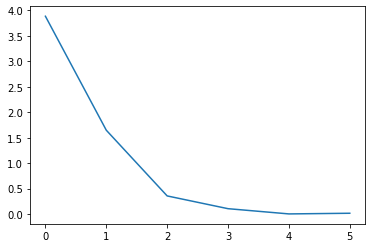

[3.88219326e+00 1.64490250e+00 3.55104280e-01 1.04547383e-01
 1.88540957e-03 1.48677529e-02]


In [24]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

4 bileşen tarafından açıklanabilir.

4. Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

5. Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

Tercih ederdim çünkü daha hızlı şekilde modelin eğitilmesi için daha az feature gereklidir.